# UV VIS Spectroscopy


In [29]:
#Import

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Funktionen

## Daten einlesen

In [32]:
df = pd.read_csv('abs.csv', header = [0,1])
df

,toluene,Unnamed: 1_level_0,sample14,Unnamed: 3_level_0,benzonitrile,Unnamed: 5_level_0,sample13,Unnamed: 7_level_0,sample15,Unnamed: 9_level_0,Unnamed: 10_level_0
,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Unnamed: 10_level_1
0,800,0.044102,800,0.001488,800,0.045439,800,-0.011290,800,-0.024183,NaN
1,799,0.045645,799,0.003400,799,0.046010,799,-0.009754,799,-0.026257,NaN
2,798,0.045992,798,0.006005,798,0.045076,798,-0.008138,798,-0.027490,NaN
3,797,0.044917,797,0.003755,797,0.043213,797,-0.004876,797,-0.025832,NaN
4,796,0.045206,796,0.003967,796,0.046153,796,-0.004328,796,-0.029604,NaN
...,...,...,...,...,...,...,...,...,...,...,...
496,304,0.073125,304,0.025425,304,0.630754,304,-0.176905,304,-0.079274,NaN
497,303,0.074541,303,0.023657,303,0.643489,303,-0.182187,303,-0.081490,NaN
498,302,0.077087,302,0.025028,302,0.662530,302,-0.193376,302,-0.087340,NaN


## Plots


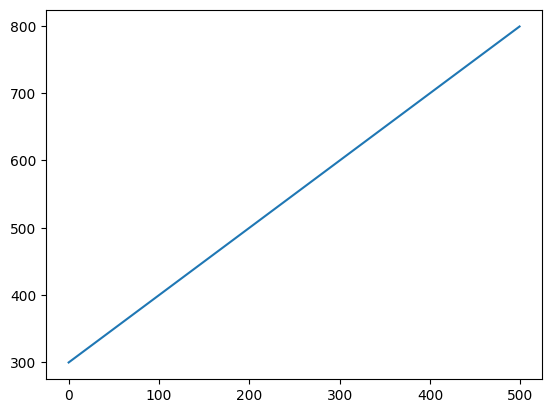

In [31]:
plt.plot(df)